# Fraudulent Firm Classification: A Case Study of an External Audit

### Project 1
#### Project description:
Please read the Data Set Information section to learn about this dataset.
Data description is also provided for thi dataset.
Read data into Jupyter notebook, use pandas to import data into a data frame
Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.
#### Regression Task:
Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results.
Then use cross validation to find average training and testing score.
Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels.
Finally find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.
#### Classification task:
Decide aboute a good evaluation strategy and justify your choice.
Find best parameters for following classification models: KNN classifcation, Logistic Regression, Linear Supprt Vector Machine, Kerenilzed Support Vector Machine, Decision Tree.
Which model gives the best results?

#### Data Set Information:
This dataset is taken from a research explained here.

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe.

_** The main objective of this project is to perform the audit risk analysis using 776 target firm's historical data. Our main foucs is on determining the Rish Audit Score and preddiction of Risk Class. We used several supervised techniques (Regression, Classification) to determine the Risk Audit Score and Predict the Risk Class which will be discussed below.** _

_** We followed a sequence of steps starting with with importing required libraries, data merging, data pre-processing, data vizualization, etc. So let's get started **_

### Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importing Datasets

In [9]:
audit = pd.read_csv('audit_risk.csv')
trial = pd.read_csv('trial.csv')

### Data Distribution

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
Risk,,,,,,,,,,,,,,,,,,,,,
0,471,471,471,471,471,471,471,471,471,471,...,471,471,471,471,471,471,471,471,471,471
1,305,305,305,305,305,305,305,305,305,305,...,305,305,305,305,305,305,305,305,305,305


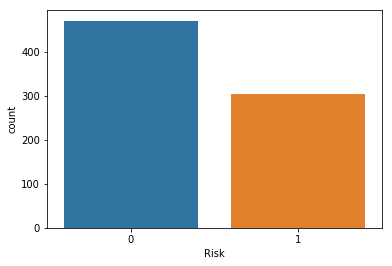

In [10]:
sns.countplot(audit['Risk'])
audit.groupby('Risk').count()

#### Audit_Risk Vs Risk

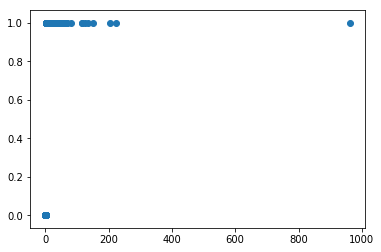

In [11]:
plt.scatter(audit['Audit_Risk'],audit['Risk'])

## We can see an outlier that screws can screw out analysis. We will handle this outlier in data pre-processing.

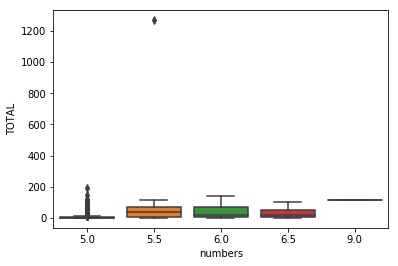

In [12]:
sns.boxplot(audit['numbers'],audit['TOTAL'])

C:\Users\Tanmay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


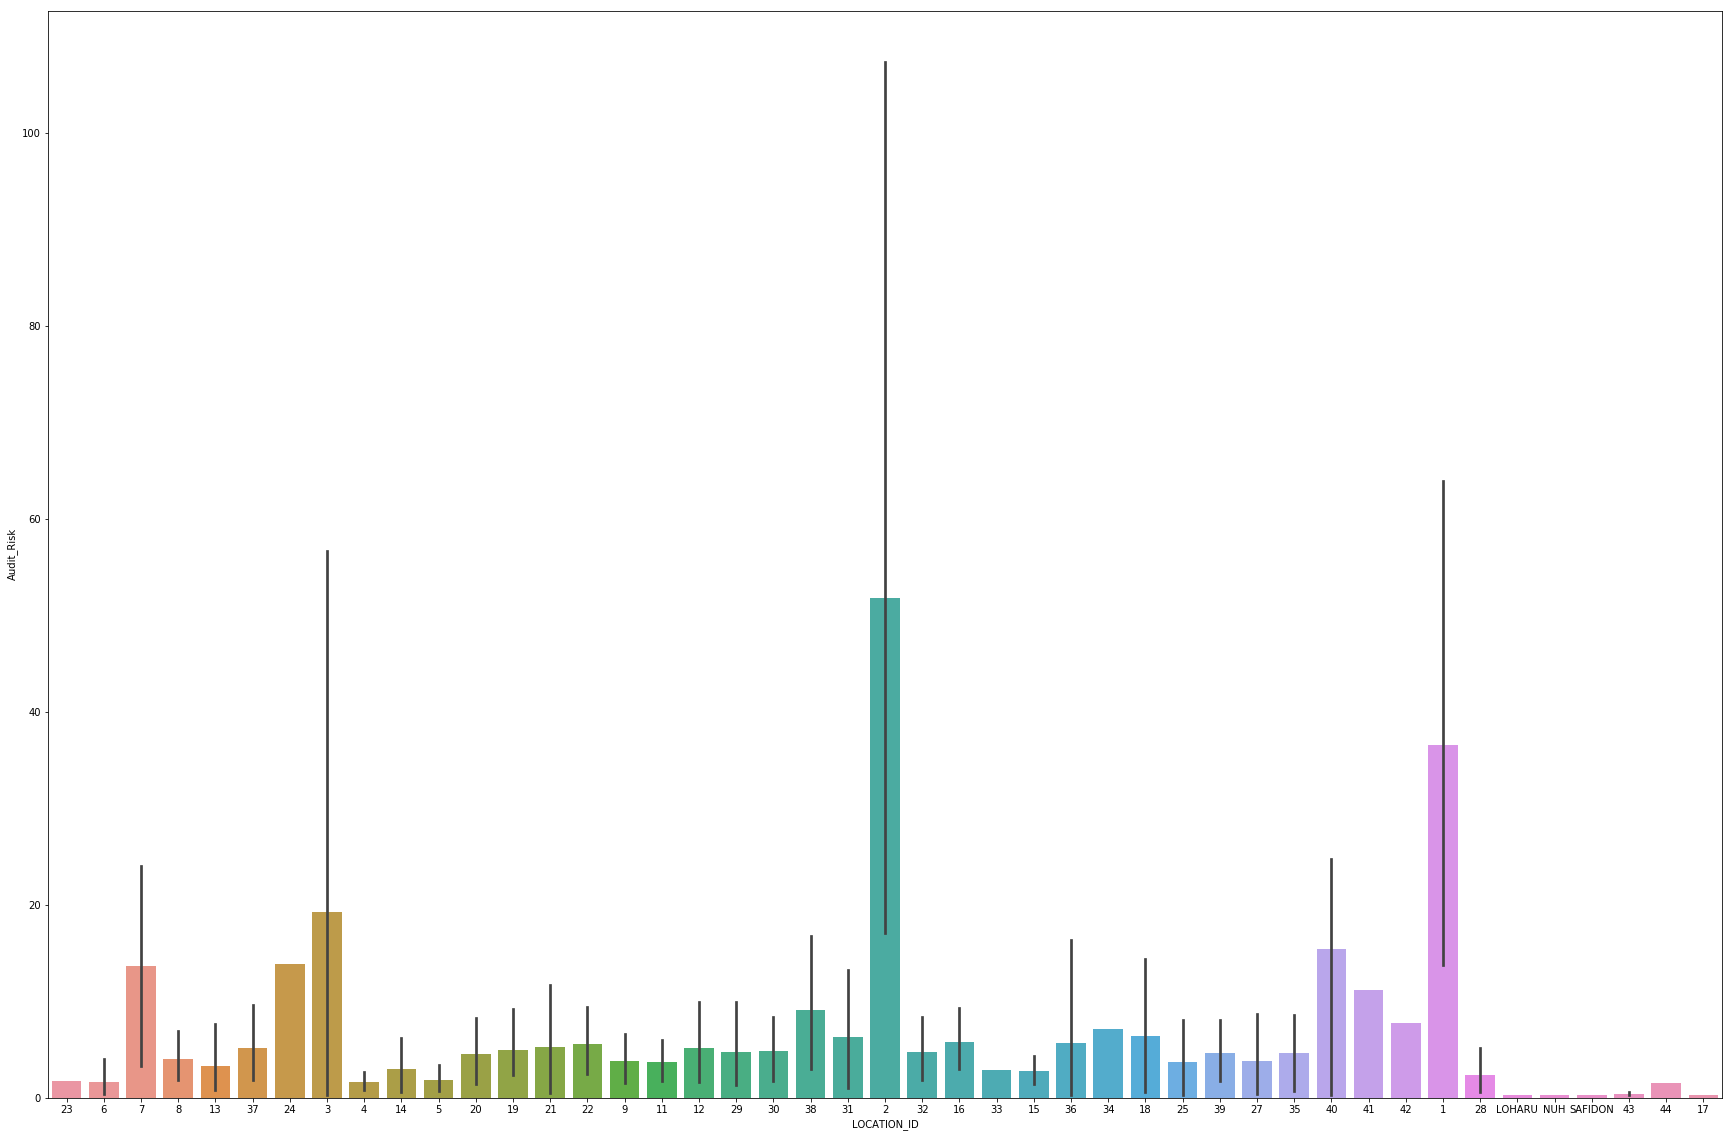

In [13]:
plt.figure(figsize=(30,20))
sns.barplot(x='LOCATION_ID',y='Audit_Risk',data= audit,estimator=np.mean)

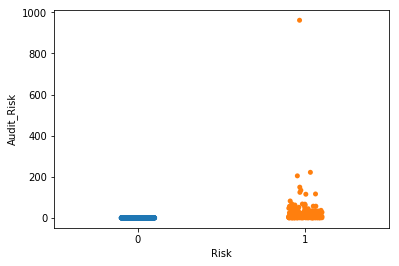

In [14]:
#loooking for outliers in the audit's risk colum
sns.stripplot(x='Risk',y='Audit_Risk',data=audit)

### Data Pre-processing

1. Imputing Missing values
2. Merging Data
3. Checking for outliers

#### 1. Imputing Missing Values

In [15]:
audit['Money_Value'].unique()

array([3.3800e+00, 9.4000e-01, 0.0000e+00, 1.1750e+01, 2.9500e+00,
       4.4950e+01, 7.7900e+00, 7.3400e+00, 1.9300e+00, 4.4200e+00,
       9.6000e-01, 1.0430e+01, 7.0000e-03, 9.0000e+00, 4.1280e+01,
       1.4030e+01, 6.3180e+01, 3.4240e+01, 1.0000e-02, 2.0519e+02,
       1.0000e-01, 1.1160e+01, 1.2500e+00, 1.4600e+00, 6.7800e+00,
       1.1600e+00, 1.5241e+02, 1.0800e+00, 2.8400e+00, 9.0000e-01,
       9.6700e+00, 3.2680e+01, 9.3503e+02, 2.9630e+01, 1.1000e-01,
       2.6200e+00, 6.0000e-02, 2.4300e+00, 1.2613e+02, 2.0790e+01,
       1.5692e+02, 1.2290e+01, 2.2900e+00, 7.7800e+00, 2.5100e+00,
       8.3100e+00, 1.6000e-01, 4.7900e+01, 8.9100e+00, 4.9500e+00,
       1.7500e+00, 6.8000e-01, 1.5820e+01, 5.8000e-01, 2.1531e+02,
       5.0000e-02, 5.3340e+01, 1.0690e+01, 5.6900e+00, 1.3500e+00,
       1.1690e+01, 1.4600e+01, 2.0780e+01, 1.0222e+02, 7.4000e-01,
       8.7337e+02, 1.4000e+00, 4.2000e-01, 3.6520e+01, 6.0200e+00,
       1.7160e+01, 1.2910e+01, 1.0790e+01, 3.4600e+00, 2.3300e

In [16]:
trial['Money_Value'].unique()

array([3.3800e+00, 9.4000e-01, 0.0000e+00, 1.1750e+01, 2.9500e+00,
       4.4950e+01, 7.7900e+00, 7.3400e+00, 1.9300e+00, 4.4200e+00,
       9.6000e-01, 1.0430e+01, 7.0000e-03, 9.0000e+00, 4.1280e+01,
       1.4030e+01, 6.3180e+01, 3.4240e+01, 1.0000e-02, 2.0519e+02,
       1.0000e-01, 1.1160e+01, 1.2500e+00, 1.4600e+00, 6.7800e+00,
       1.1600e+00, 1.5241e+02, 1.0800e+00, 2.8400e+00, 9.0000e-01,
       9.6700e+00, 3.2680e+01, 9.3503e+02, 2.9630e+01, 1.1000e-01,
       2.6200e+00, 6.0000e-02, 2.4300e+00, 1.2613e+02, 2.0790e+01,
       1.5692e+02, 1.2290e+01, 2.2900e+00, 7.7800e+00, 2.5100e+00,
       8.3100e+00, 1.6000e-01, 4.7900e+01, 8.9100e+00, 4.9500e+00,
       1.7500e+00, 6.8000e-01, 1.5820e+01, 5.8000e-01, 2.1531e+02,
       5.0000e-02, 5.3340e+01, 1.0690e+01, 5.6900e+00, 1.3500e+00,
       1.1690e+01, 1.4600e+01, 2.0780e+01, 1.0222e+02, 7.4000e-01,
       8.7337e+02, 1.4000e+00, 4.2000e-01, 3.6520e+01, 6.0200e+00,
       1.7160e+01, 1.2910e+01, 1.0790e+01, 3.4600e+00, 2.3300e

Both audit & trail have one missing value. Since dataset is small its better to impute the missing value rather than removing missing values. So let's impute the missing Money_Value with it's mean grouped by 'numbers' column

In [17]:
audit[audit['Money_Value'].isnull()]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
642,55.57,4,0.23,0.2,0.046,0.0,0.2,0.0,0.23,5.0,...,0.4,0,0.2,0.0,2.0,1.446,0.4,0.5,0.2892,0


In [18]:
audit['Sector_score'].value_counts()

55.57    200
3.89     114
1.85      95
2.72      82
3.41      76
2.37      74
1.99      47
21.61     41
59.85     37
2.34       5
15.56      3
2.36       1
17.68      1
Name: Sector_score, dtype: int64

In [26]:
audit[['Sector_score','Money_Value']].groupby('Sector_score').mean()

,Money_Value
Sector_score,
1.85,2.401579
1.99,26.892340
2.34,16.792000
2.36,88.400000
2.37,5.569189
2.72,30.059512
3.41,18.294737
3.89,33.157842
15.56,193.896667


In [19]:
audit[['Sector_score','Money_Value']].groupby('Sector_score').median()

,Money_Value
Sector_score,
1.85,0.020
1.99,0.050
2.34,0.000
2.36,88.400
2.37,0.575
2.72,8.325
3.41,10.215
3.89,2.565
15.56,160.410


Sector_Score - Is the score of each firm mentioned above in Data Description

Missing value is in 'Money_Value' that falls under Sector_Score = 55.57.

Impute the missing value with median of Money_Value under Sector_score = 55.57

In [20]:
audit['Money_Value'].fillna(0,inplace=True)
trial['Money_Value'].fillna(0,inplace=True)

#### 2. Merging Datasets

Both dataframes (audit, trial) have similar columns that hold similar value

First sort by common columns and concatenate later

So selecting only unique column from trial data frame and concatenating to audit for analysis

Removing the column ('LOCATION_ID') on which analysis is not done

In [21]:
# Sorting the data frames
audit = audit.sort_values(by=['LOCATION_ID','TOTAL'])
trial = trial.sort_values(by=['LOCATION_ID','TOTAL'])

#Concatinate data frames
data = pd.concat([audit,trial[['Loss','History_score','LOSS_SCORE','MONEY_Marks']]],axis=1)

#Removing LOCATION_ID
data.drop('LOCATION_ID',axis=1,inplace=True)

#### 3. Handling Outliers

In data distribution section we can across an outlier with large Audit_Risk, TOTAL value. We can handle this enither by imputing with a mean value or removing the outlier value.

Let's remove the outlier observation from data

In [22]:
data['TOTAL'].max()
# 1268.91

1268.91

In [23]:
data[data['TOTAL'] == 1268.91]

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Loss,History_score,LOSS_SCORE,MONEY_Marks
241,2.72,4.28,0.6,2.568,1264.63,0.6,758.778,1268.91,5.5,0.4,...,5.2,801.262,2.4,0.5,961.5144,1,0,6,2,6


In [24]:
# index = 241
data.drop(241,inplace=True)

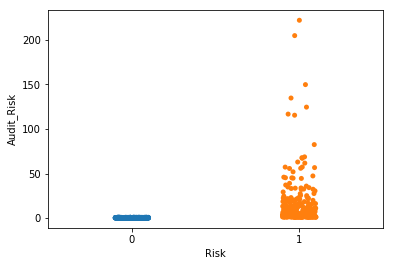

In [25]:
#loooking for outliers in the risk colum after removing outlier
sns.stripplot(x='Risk',y='Audit_Risk',data=data)

### Feature Selection

In [26]:
data.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
       'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History',
       'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'Loss', 'History_score',
       'LOSS_SCORE', 'MONEY_Marks'],
      dtype='object')

([<matplotlib.axis.YTick at 0x207765a7320>,
 <a list of 30 Text yticklabel objects>)

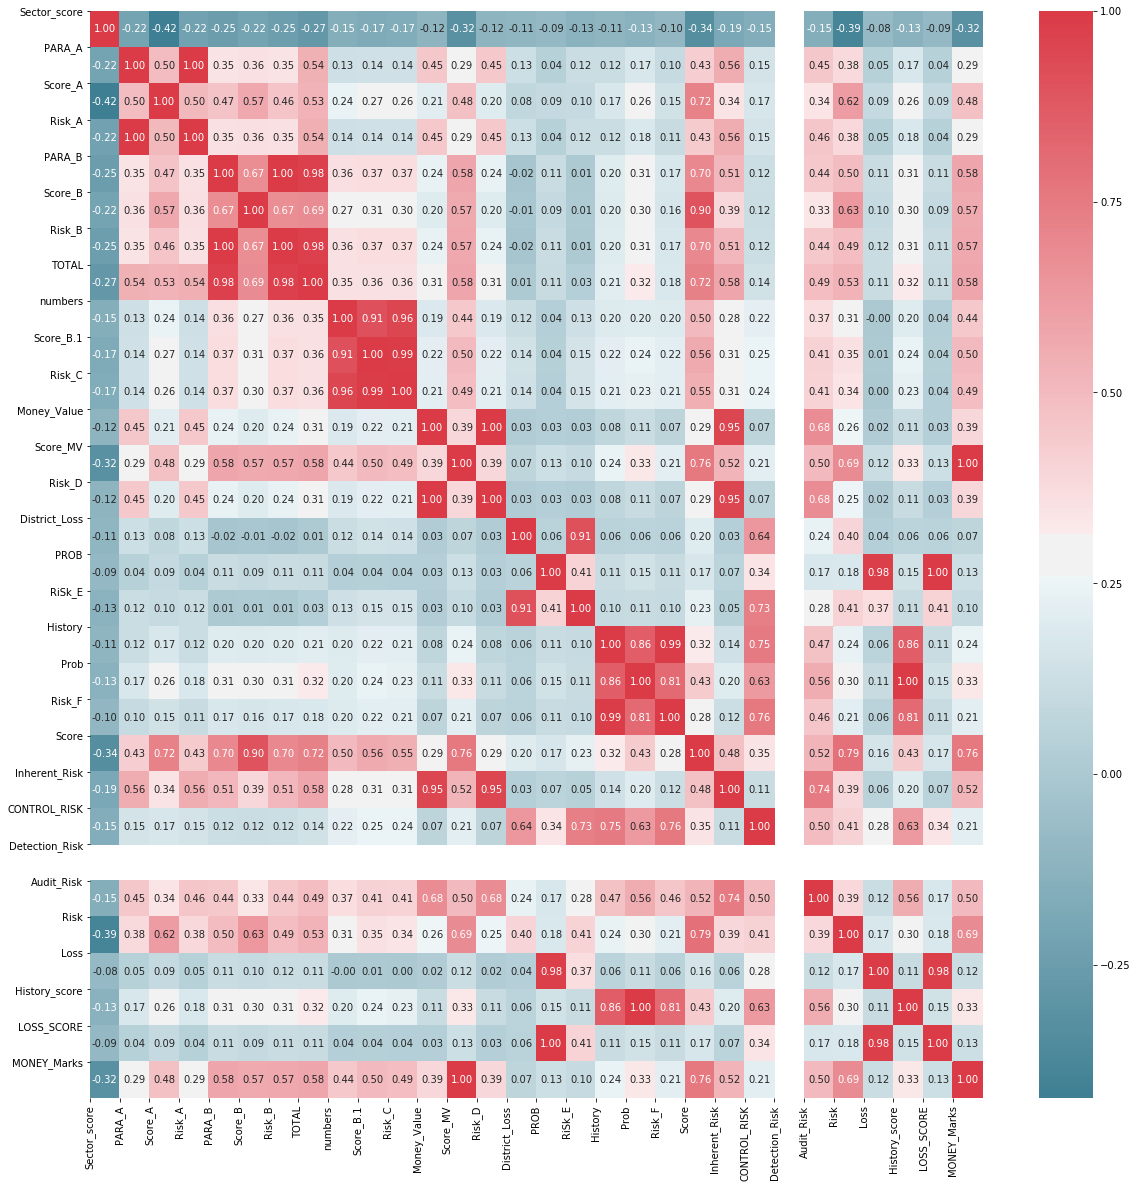

In [27]:
fig, ax = plt.subplots(figsize=(20, 20))
corr = data.corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

Highly correlated variables deflects model's accuracy. So it's better to remove variables that are highly correlated.
Choosing correlation = 0.7 as threshold and removing variables that have correlation greater than 0.7

Below are the columns that that are considered for analysis which are less correlated

Removing Risk column since it's formed due to Audit_Risk score. Being Risk(1/0) is due to Audit_Risk.  

In [36]:
data = data[['Sector_score', 'PARA_A', 'Score_A','PARA_B', 'Score_B','numbers','Money_Value','Score_MV','District_Loss','LOSS_SCORE','History_score','Audit_Risk']]

In [28]:
data.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
       'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History',
       'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'Loss', 'History_score',
       'LOSS_SCORE', 'MONEY_Marks'],
      dtype='object')

### Data Scaling
Since the variables we considered for analysis are not in same range we need to scale them before analysis.

In [29]:
X = data.drop('Audit_Risk',axis=1)
y = data['Audit_Risk']

from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Supervised Learning - Regression
1. Linear Regression
2. KNN Regressor
3. Ridge Regression
4. Lasso Regression
5. Polynomial Regression
6. SVM (simple & kernal)

#### 1.Linear Regression

In [30]:
#Linear Regression
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Train:%.4f"%lr.score(X_train,y_train))
print("Test:%.4f"%lr.score(X_test,y_test))
pred = lr.predict(X_test)

print("Mean Squared Error Test:", metrics.mean_squared_error(y_test,pred))

Train:0.8754
Test:0.7862
Mean Squared Error Test: 79.39935189355214


In [31]:
# Using GridSearch
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,param_grid=parameters,cv=5)
grid.fit(X_train,y_train)
print("Train:%.4f"%grid.score(X_train,y_train))
print("Test:%.4f"%grid.score(X_test,y_test))
print("Best Parameters:{}",format(grid.best_params_))

Train:0.8754
Test:0.7862
Best Parameters:{} {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [32]:
#cross validation
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
train_score = cross_val_score(lr,X_train,y_train,cv=10)
test_score = cross_val_score(lr,X_test,y_test,cv=10)

print("Avg Train Score:%.4f"%train_score.mean())
print("Avg Test Score:%.4f"%test_score.mean())

Avg Train Score:0.7118
Avg Test Score:0.0052


#### 2. KNN Regression

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Tanmay\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


Train score: {} [1.0, 0.894733093952973, 0.8461817614780334, 0.8255531830254299, 0.7758506266763018, 0.7493806870701047, 0.7270382735476235, 0.7030527979104884, 0.6816066542757047, 0.667871552220663, 0.6484968145612784, 0.6317522407011247, 0.6264683609023544, 0.6124330968272108, 0.60066945805928, 0.5896112637500461, 0.5760990430867345, 0.5723937397576825, 0.5601300366523281]
Test score: {} [0.555426906073019, 0.5224709338616584, 0.45428751648614374, 0.5152491774119943, 0.46826186939141756, 0.438929078385198, 0.41549405108009274, 0.43809129179662487, 0.43508483232043493, 0.4350781049553293, 0.4278709103331436, 0.4114843288067267, 0.49304023937332186, 0.4756724187124799, 0.46057615374592686, 0.4487167802988101, 0.43641323850174574, 0.42572347693794044, 0.4168035171285023]


Text(0, 0.5, 'MSE')

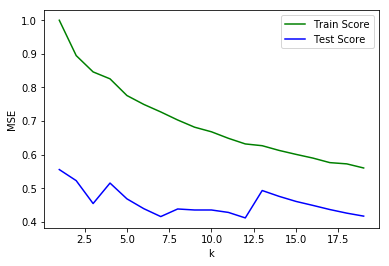

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

print("Train score: {}",format(train_score_array))
print("Test score: {}",format(test_score_array))
x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [34]:
knn = KNeighborsRegressor(3)
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.8461817614780334
0.45428751648614374


In [35]:
# Using Cross Validation
from sklearn.model_selection import cross_val_score
knn_reg = KNeighborsRegressor(n_neighbors=3)
train_score = cross_val_score(knn_reg,X_train,y_train,cv=10)
test_score = cross_val_score(knn_reg,X_test,y_test,cv=10)

print("Avg Train Score:%.4f"%train_score.mean())
print("Avg Test Score:%.4f"%test_score.mean())
pred = knn.predict(X_test)
print("Mean Squared Error Test:", metrics.mean_squared_error(y_test,pred))

Avg Train Score:0.6969
Avg Test Score:0.3324
Mean Squared Error Test: 202.69163310727586


Text(0, 0.5, 'Cross-Validated Accuracy')

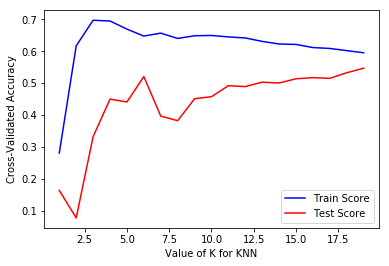

In [36]:
k_range = range(1, 20)
# list of scores from k_range
k_train_scores = []
k_test_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsRegressor with k neighbours
    knn = KNeighborsRegressor(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsRegressor with k neighbours
    scores1 = cross_val_score(knn, X_train, y_train, cv=10)
    scores2 = cross_val_score(knn, X_test, y_test, cv=10)
    # 4. append mean of scores for k neighbors to k_scores list
    k_train_scores.append(scores1.mean())
    k_test_scores.append(scores2.mean())

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_train_scores,'b',label='Train Score')
plt.plot(k_range, k_test_scores,'r',label='Test Score')
plt.legend()
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [37]:
#Most efficient parameter using GridSearch()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10)
grid.fit(X_train,y_train)
grid.best_score_
grid.best_estimator_

print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

results = pd.DataFrame(grid.cv_results_)
# show the first 5 rows
display(results.head())

Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.70


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001397,0.000483,0.001595,0.000488,1,{'n_neighbors': 1},0.522805,0.581121,0.817417,0.405722,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001101,0.000298,0.001791,0.000397,2,{'n_neighbors': 2},0.384655,0.854998,0.907396,0.063985,...,0.889439,0.892608,0.854583,0.895783,0.883048,0.894911,0.902009,0.893721,0.891513,0.021273
2,0.001384,0.000498,0.002099,0.000544,3,{'n_neighbors': 3},0.411723,0.730543,0.901442,0.378372,...,0.837729,0.861765,0.770889,0.841650,0.846500,0.845041,0.847451,0.845608,0.843936,0.030479
3,0.001399,0.000494,0.002590,0.000665,4,{'n_neighbors': 4},0.405767,0.667780,0.858717,0.413095,...,0.810366,0.815312,0.732107,0.821373,0.802651,0.822921,0.815627,0.823918,0.813013,0.035591
4,0.001193,0.000401,0.002191,0.000594,5,{'n_neighbors': 5},0.426829,0.511298,0.834245,0.432922,...,0.753595,0.781022,0.697155,0.778688,0.767223,0.773886,0.770477,0.773186,0.765540,0.033018


#### 3.Ridge Regression

Text(0.5, 0, '$\\alpha$')

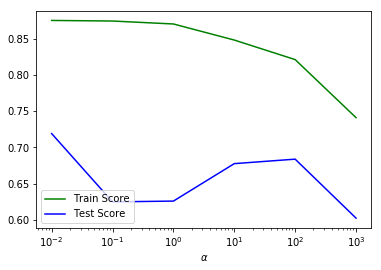

In [38]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100,1000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [39]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))
pred = ridge.predict(X_test)
print("Mean Squared Error Test:", metrics.mean_squared_error(y_test,pred))

Train score: 0.8751
Test score: 0.7191
Mean Squared Error Test: 104.32245495319648


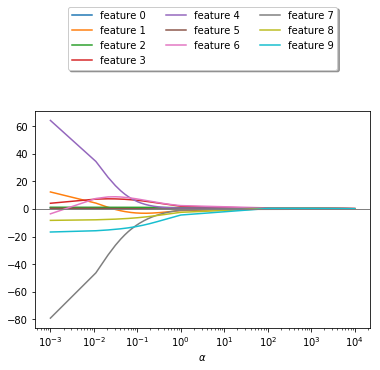

In [40]:
x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 100).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,10):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)

In [41]:
#cross validation
ridge = Ridge(alpha = 1000)
train_score = cross_val_score(ridge,X_train,y_train,cv=5)
test_score = cross_val_score(ridge,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score.mean())
print("Avg Test Score:%.4f"%test_score.mean())


Avg Train Score:0.7492
Avg Test Score:0.2106


Text(0, 0.5, 'Cross-Validated Accuracy')

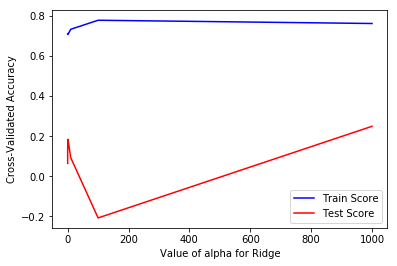

In [42]:
alpha = [0.001,0.01, 0.1,1,10,100,1000]

ridge_train_scores = []
ridge_test_scores = []

# 1. we will loop through reasonable values of k
for i in alpha:
    # 2. run KNeighborsClassifier with k neighbours
    ridge = Ridge(i)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores1 = cross_val_score(ridge, X_train, y_train, cv=10)
    scores2 = cross_val_score(ridge, X_test, y_test, cv=10)
    # 4. append mean of scores for k neighbors to k_scores list
    ridge_train_scores.append(scores1.mean())
    ridge_test_scores.append(scores2.mean())

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(alpha, ridge_train_scores,'b',label='Train Score')
plt.plot(alpha, ridge_test_scores,'r',label='Test Score')
plt.legend()
plt.xlabel('Value of alpha for Ridge')
plt.ylabel('Cross-Validated Accuracy')

In [52]:
# GridSearch()
from sklearn.model_selection import GridSearchCV
alphas = np.array([1000,100,10,1,0.1,0.01,0.001])
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train,y_train)

print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

results = pd.DataFrame(grid.cv_results_)
# show the first 5 rows
display(results.head())

Best parameters: {'alpha': 100.0}
Best cross-validation score: 0.75


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are ac

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.000665,4.703589e-04,0.000332,0.00047,1000,{'alpha': 1000.0},0.398668,0.554192,0.695971,0.549374,0.121372,7,0.535237,0.495344,0.580431,0.537004,0.034759
1,0.000665,4.701341e-04,0.000332,0.00047,100,{'alpha': 100.0},0.689215,0.832997,0.715518,0.745959,0.062548,1,0.822006,0.754247,0.794914,0.790389,0.027847
2,0.000665,4.703027e-04,0.000332,0.00047,10,{'alpha': 10.0},0.739684,0.835381,0.650513,0.742007,0.075459,2,0.855724,0.781726,0.809525,0.815659,0.030519
3,0.000997,6.257699e-07,0.000000,0.00000,1,{'alpha': 1.0},0.741957,0.830478,0.638977,0.737296,0.078218,3,0.856533,0.782261,0.809765,0.816186,0.030660
4,0.000665,4.701903e-04,0.000332,0.00047,0.1,{'alpha': 0.1},0.742083,0.829887,0.637732,0.736727,0.078507,4,0.856542,0.782267,0.809767,0.816192,0.030661


#### 4.Lasso

Text(0.5, 0, '$\\alpha$')

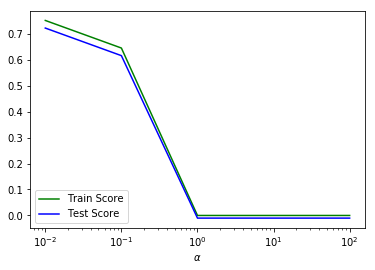

In [126]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [128]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))
pred = lasso.predict(X_test)
print("Mean Squared Error Test:", metrics.mean_squared_error(y_test,pred))

Train score: 0.7507
Test score: 0.7214
Mean Squared Error Test: 0.06837231408835201


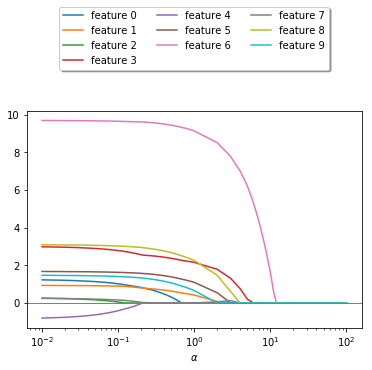

In [55]:
x_range1 = np.linspace(0.01, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 100, 100).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,10):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)

In [56]:
#Grid_Search
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Lasso(),param_grid,cv=5,return_train_score=True)
grid_search.fit(X_train,y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

Best parameters: {'alpha': 1}
Best cross-validation score: 0.78


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001197,0.000399,0.000599,0.000489,0.001,{'alpha': 0.001},0.711292,0.779671,0.836786,0.804050,...,0.757222,0.065921,4,0.864058,0.804731,0.782604,0.802692,0.807802,0.812377,0.027315
1,0.000598,0.000488,0.000200,0.000399,0.01,{'alpha': 0.01},0.710543,0.780421,0.836825,0.804907,...,0.757935,0.065382,3,0.864051,0.804726,0.782598,0.802688,0.807798,0.812372,0.027314
2,0.000798,0.000399,0.000200,0.000399,0.1,{'alpha': 0.1},0.702928,0.787085,0.836888,0.811639,...,0.764212,0.060801,2,0.863373,0.804272,0.782035,0.802259,0.807381,0.811864,0.027251
3,0.000399,0.000489,0.000399,0.000489,1,{'alpha': 1},0.652578,0.799481,0.831704,0.817577,...,0.783910,0.066460,1,0.840770,0.787063,0.760455,0.787324,0.790834,0.793289,0.026126
4,0.000399,0.000489,0.000199,0.000399,10,{'alpha': 10},-0.020456,0.252622,-0.009534,0.173865,...,0.114253,0.109390,5,0.000000,0.211887,0.000000,0.288305,0.271541,0.154346,0.128558


In [ ]:
#cross validation
lasso = Lasso(alpha =0.001)
train_score = cross_val_score(lasso,X_train,y_train,cv=5)
test_score = cross_val_score(lasso,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score.mean())
print("Avg Test Score:%.4f"%test_score.mean())

#### 5. Polynomial

In [138]:
from sklearn.preprocessing import PolynomialFeatures

train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lr.fit(X_train_poly, y_train)
    train_score_list.append(lr.score(X_train_poly, y_train))
    test_score_list.append(lr.score(X_test_poly, y_test))

print(train_score_list)
print(test_score_list)
pred = lr.predict(X_test_poly)
print("Mean Squared Error Test:", metrics.mean_squared_error(y_test,pred))

[0.7543570677111144, 0.9052075426722959]
[0.723262853740192, 0.692590358908533]
Mean Squared Error Test: 0.0754417167065677


#### 6. SVM(simple)

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


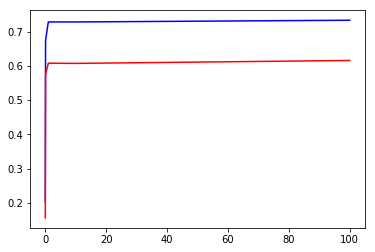

In [59]:
from sklearn.svm import LinearSVR
train_score = []
test_score = []
C = [0.01,0.1,1,10,100]

for i in C:
    svr = LinearSVR(C=i)
    svr.fit(X_train,y_train)
    train_score.append(svr.score(X_train,y_train))
    test_score.append(svr.score(X_test,y_test))

plt.plot(C,train_score,'b')
plt.plot(C,test_score,'r')

In [60]:
svr = LinearSVR(C=10)
svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(svr.score(X_test, y_test)))

Train score: 0.7283
Test score: 0.6079


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [61]:
# Grid_Search
from sklearn.model_selection import GridSearchCV
param_grid ={'C':[0.001, 0.01, 0.1, 1, 10]} 
grid_search = GridSearchCV(LinearSVR(),param_grid,cv=5,return_train_score=True)

grid_search.fit(X_train,y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Best parameters: {'C': 10}
Best cross-validation score: 0.77


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000599,0.000489,0.000399,0.000488,0.001,{'C': 0.001},-0.091631,-0.116477,-0.104109,-0.114329,...,-0.106473,0.008810,5,-0.096575,-0.078264,-0.081366,-0.082063,-0.083141,-0.084282,0.006357
1,0.001005,0.000016,0.000000,0.000000,0.01,{'C': 0.01},0.083348,0.237636,0.126652,0.290511,...,0.214710,0.095759,4,0.185681,0.161111,0.154043,0.171754,0.162088,0.166935,0.010939
2,0.001590,0.000483,0.000199,0.000399,0.1,{'C': 0.1},0.513570,0.777305,0.663533,0.730323,...,0.691051,0.097524,3,0.712119,0.632420,0.567714,0.661228,0.665393,0.647775,0.047491
3,0.015167,0.003713,0.000399,0.000489,1,{'C': 1},0.628647,0.820101,0.791174,0.778122,...,0.768947,0.072406,2,0.804533,0.709942,0.680977,0.699467,0.722117,0.723407,0.042750
4,0.023535,0.001493,0.000199,0.000399,10,{'C': 10},0.629853,0.817235,0.810138,0.777214,...,0.773586,0.074164,1,0.805866,0.719995,0.704486,0.698405,0.723698,0.730490,0.038842


In [62]:
#cross validation
svr = LinearSVR(C=10)
train_score = cross_val_score(svr,X_train,y_train,cv=5)
test_score = cross_val_score(svr,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score.mean())
print("Avg Test Score:%.4f"%test_score.mean())

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Avg Train Score:0.7734
Avg Test Score:0.5096


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

#### SVM(Kernel = RBF)

In [ ]:
from sklearn.svm import SVR
param_grid = { "C":[0.0001,0.001,0.01,1,10],
             "gamma":[0.0001,0.001,0.01,1,10]
             }
svr_reg = GridSearchCV(SVR(kernel='rbf'),param_grid,cv=5)

svr_reg.fit(X_train,y_train)

print("Best parameters: {}".format(svr_reg.best_params_))
print("Best cross-validation score: {:.2f}".format(svr_reg.best_score_))
print('Train score: {:.4f}'.format(svr_reg.score(X_train,y_train)))
print('Test score: {:.4f}'.format(svr_reg.score(X_test, y_test)))
pred = svr_reg.predict(X_test)
print("Mean Squared Error Test:", metrics.mean_squared_error(y_test,pred))

#### SVM(Kernel = Poly)

In [ ]:
from sklearn.svm import SVR
param_grid = { "C":[0.0001,0.001,0.01,1,10],
             "gamma":[0.0001,0.001,0.01,1,10]
             }
svr_reg = GridSearchCV(SVR(kernel='poly'),param_grid,cv=5)

svr_reg.fit(X_train,y_train)

print("Best parameters: {}".format(svr_reg.best_params_))
print("Best cross-validation score: {:.2f}".format(svr_reg.best_score_))
print('Train score: {:.4f}'.format(svr_reg.score(X_train,y_train)))
print('Test score: {:.4f}'.format(svr_reg.score(X_test, y_test)))
pred = svr_reg.predict(X_test)
print("Mean Squared Error Test:", metrics.mean_squared_error(y_test,pred))

 #### SVM(Kernel = Linear)

In [ ]:
from sklearn.svm import SVR
param_grid = { "C":[0.0001,0.001,0.01,1,10],
             "gamma":[0.0001,0.001,0.01,1,10]
             }
svr_reg = GridSearchCV(SVR(kernel='linear'),param_grid,cv=5)

svr_reg.fit(X_train,y_train)

print("Best parameters: {}".format(svr_reg.best_params_))
print("Best cross-validation score: {:.2f}".format(svr_reg.best_score_))
print('Train score: {:.4f}'.format(svr_reg.score(X_train,y_train)))
print('Test score: {:.4f}'.format(svr_reg.score(X_test, y_test)))
pred = svr_reg.predict(X_test)
print("Mean Squared Error Test:", metrics.mean_squared_error(y_test,pred))

## Supervised Learning - Classification

1. KNN Classification
2. Logistic Regression
3. Linear SVM
4. Kernalized SVM
5. Decision Tree

In [63]:
audit = pd.read_csv('audit_risk.csv')
trial = pd.read_csv('trial.csv')
audit['Money_Value'].fillna(0,inplace=True)
trial['Money_Value'].fillna(0,inplace=True)
# Sorting the data frames
audit = audit.sort_values(by=['LOCATION_ID','TOTAL'])
trial = trial.sort_values(by=['LOCATION_ID','TOTAL'])

#Concatinate data frames
data = pd.concat([audit,trial[['Loss','History_score','LOSS_SCORE','MONEY_Marks']]],axis=1)

#Removing LOCATION_ID
data.drop('LOCATION_ID',axis=1,inplace=True)

data['TOTAL'].max()
# 1268.91
data[data['TOTAL'] == 1268.91]
# index = 241
data.drop(241,inplace=True)

Repeating the same Data pre-processing, exploratory analysis, and feature selection.

Only difference is for classification we consider Risk variable.

So we drop the Audit_Risk and include Risk variable for analysis.

In [64]:
data = data[['Sector_score', 'PARA_A', 'Score_A','PARA_B', 'Score_B','numbers','Money_Value','Score_MV','District_Loss','LOSS_SCORE','History_score','Risk']]

In [65]:
from sklearn.model_selection import train_test_split
X = data.drop('Risk',axis=1)
y = data['Risk']

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train_org)
X_test = scale.transform(X_test_org)

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### 1. KNN Classification

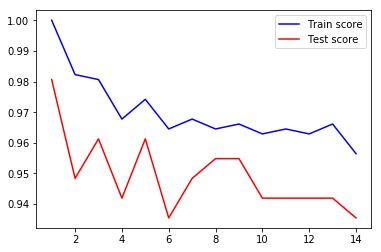

In [66]:
from sklearn.neighbors import KNeighborsClassifier
train_score = []
test_score = []

n = range(1,15)
for i in n:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))

plt.plot(n,train_score,'b',label='Train score')
plt.plot(n,test_score,'r',label = 'Test score')
plt.legend()

In [67]:
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9742
Test score: 0.9613


In [68]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = knn.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[87  1]
 [ 5 62]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        88
           1       0.98      0.93      0.95        67

   micro avg       0.96      0.96      0.96       155
   macro avg       0.96      0.96      0.96       155
weighted avg       0.96      0.96      0.96       155



In [69]:
#Cross validation
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
scores1= cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy')

print('Avg train score: {:.4f}'.format(scores.mean()))
print('Avg train score: {:.4f}'.format(scores1.mean()))

Avg train score: 0.9629
Avg train score: 0.9348


In [70]:
#Grid Search
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 21))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)
print('Best Score: {:.4f}'.format(grid.best_score_))
print('Best Paramater: {:}'.format(grid.best_params_))

Best Score: 0.9710
Best Paramater: {'n_neighbors': 1}


In [71]:
cvres = grid.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_score), params)

0.9853769542340047 {'n_neighbors': 1}
0.9796312670361429 {'n_neighbors': 2}
0.981276324898574 {'n_neighbors': 3}
0.981276324898574 {'n_neighbors': 4}
0.9804541409880654 {'n_neighbors': 5}
0.9788077013024735 {'n_neighbors': 6}
0.981276324898574 {'n_neighbors': 7}
0.9771584874918804 {'n_neighbors': 8}
0.9796312670361429 {'n_neighbors': 9}
0.9779834420393966 {'n_neighbors': 10}
0.9788077013024735 {'n_neighbors': 11}
0.9763328358974787 {'n_neighbors': 12}
0.9771584874918804 {'n_neighbors': 13}
0.9755064854862865 {'n_neighbors': 14}
0.9746794344808963 {'n_neighbors': 15}
0.9738516810963533 {'n_neighbors': 16}
0.9746794344808963 {'n_neighbors': 17}
0.9730232235401101 {'n_neighbors': 18}
0.9730232235401101 {'n_neighbors': 19}
0.9713641887040999 {'n_neighbors': 20}


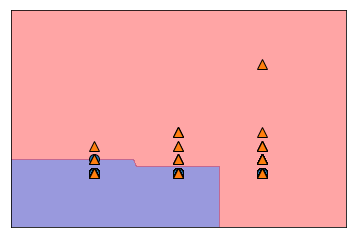

In [72]:
import mglearn
x_b = X_train[0:774,[2,5]]
y_b = y_train[0:774]

knn = KNeighborsClassifier(7)
knn.fit(x_b, y_b)

mglearn.plots.plot_2d_separator(knn, x_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(x_b[:, 0], x_b[:, 1], y_b)

#### 2. Logistic Regression

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

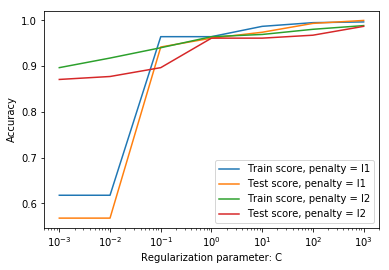

In [73]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [74]:
log_l1 = LogisticRegression(penalty = 'l1', C = 0.1)
log_l2 = LogisticRegression(penalty = 'l2', C = 1)
log_l1.fit(X_train,y_train)
log_l2.fit(X_train,y_train)
print("Penality: l1")
print("Train_score:{:.4f}".format(log_l1.score(X_train, y_train)))
print("Test_score:{:.4f}".format(log_l1.score(X_test, y_test)))
print("Penality: l2")
print("Train_score:{:.4f}".format(log_l2.score(X_train, y_train)))
print("Test_score:{:.4f}".format(log_l2.score(X_test, y_test)))

Penality: l1
Train_score:0.9645
Test_score:0.9419
Penality: l2
Train_score:0.9645
Test_score:0.9613


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
pred = log_l2.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[87  1]
 [ 5 62]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        88
           1       0.98      0.93      0.95        67

   micro avg       0.96      0.96      0.96       155
   macro avg       0.96      0.96      0.96       155
weighted avg       0.96      0.96      0.96       155



In [76]:
#Cross validation
log_l2 = LogisticRegression(penalty = 'l2', C = 1)
scores = cross_val_score(log_l2, X_train, y_train, cv=5, scoring='accuracy')
scores1= cross_val_score(log_l2, X_test, y_test, cv=5, scoring='accuracy')

print('Avg train score: {:.4f}'.format(scores.mean()))
print('Avg train score: {:.4f}'.format(scores1.mean()))

Avg train score: 0.9612
Avg train score: 0.9477


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


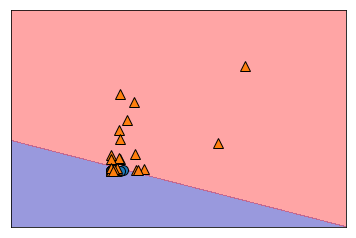

In [77]:
import mglearn
x_b = X_train[50:100, [1,3]]
y_b = y_train[50:100]

lreg = LogisticRegression()
lreg.fit(x_b, y_b) 

mglearn.plots.plot_2d_separator(lreg, x_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(x_b[:, 0], x_b[:, 1], y_b)

#### 3. Linear SVM

In [78]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC()
linear_svm.fit(X_train,y_train)
print('Train score: {:.4f}'.format(linear_svm.score(X_train,y_train)))
print('Test score: {:.4f}'.format(linear_svm.score(X_test,y_test)))

Train score: 0.9710
Test score: 0.9613


In [79]:
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
pred = linear_svm.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[87  1]
 [ 5 62]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        88
           1       0.98      0.93      0.95        67

   micro avg       0.96      0.96      0.96       155
   macro avg       0.96      0.96      0.96       155
weighted avg       0.96      0.96      0.96       155



In [80]:
#Cross validation
linear_svm = LinearSVC()
scores = cross_val_score(linear_svm, X_train, y_train, cv=5, scoring='accuracy')
scores1= cross_val_score(linear_svm, X_test, y_test, cv=5, scoring='accuracy')

print('Avg train score: {:.4f}'.format(scores.mean()))
print('Avg train score: {:.4f}'.format(scores1.mean()))

Avg train score: 0.9629
Avg train score: 0.9540


AttributeError: 'LinearSVC' object has no attribute 'coef_'

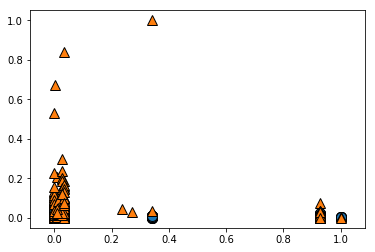

In [81]:
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
line = np.linspace(-5, 5)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-2, 2)
plt.xlim(0, 1.5)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Line class 0', 'Line class 1'], loc=(1.01, 0.3))

#### 4. Kernalized SVM

##### RBF kernal

In [83]:
#kernal = 'rbf'
from sklearn.svm import SVC
C1 = [0.01,0.1,1,10]
gamma1 = [0.01,0.1,1,10]

for i in C1:
    for j in gamma1:
        svc = SVC(C=i,kernel='rbf',gamma=j)
        svc.fit(X_train,y_train)
        print('C:{},gamma:{}'.format(i,j))
        print('Train score: {:.4f},Test score: {:.4f}'.format(svc.score(X_train,y_train),svc.score(X_test,y_test)))

C:0.01,gamma:0.01
Train score: 0.6177,Test score: 0.5677
C:0.01,gamma:0.1
Train score: 0.6177,Test score: 0.5677
C:0.01,gamma:1
Train score: 0.9000,Test score: 0.8387
C:0.01,gamma:10
Train score: 0.6177,Test score: 0.5677
C:0.1,gamma:0.01
Train score: 0.6177,Test score: 0.5677
C:0.1,gamma:0.1
Train score: 0.9194,Test score: 0.8774
C:0.1,gamma:1
Train score: 0.9661,Test score: 0.9484
C:0.1,gamma:10
Train score: 0.9339,Test score: 0.9355
C:1,gamma:0.01
Train score: 0.9161,Test score: 0.8774
C:1,gamma:0.1
Train score: 0.9710,Test score: 0.9613
C:1,gamma:1
Train score: 0.9694,Test score: 0.9484
C:1,gamma:10
Train score: 0.9774,Test score: 0.9548
C:10,gamma:0.01
Train score: 0.9710,Test score: 0.9613
C:10,gamma:0.1
Train score: 0.9726,Test score: 0.9548
C:10,gamma:1
Train score: 0.9774,Test score: 0.9677
C:10,gamma:10
Train score: 0.9855,Test score: 0.9677


In [84]:
#Cross validation
svc = SVC(C=0.1,kernel='rbf',gamma=1)
scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
scores1= cross_val_score(svc, X_test, y_test, cv=5, scoring='accuracy')

print('Avg train score: {:.4f}'.format(scores.mean()))
print('Avg train score: {:.4f}'.format(scores1.mean()))

Avg train score: 0.9629
Avg train score: 0.9544


Best Parameters: C = 0.1, gamma=1

##### Linear Kernal

In [85]:
#kernal = Linear
C1 = [0.01,0.1,1,10]

for i in C1:
    svc = SVC(C=i,kernel='linear')
    svc.fit(X_train,y_train)
    print('C:{}'.format(i))
    print('Train score: {:.4f},Test score: {:.4f}'.format(svc.score(X_train,y_train),svc.score(X_test,y_test)))

C:0.01
Train score: 0.8758,Test score: 0.8452
C:0.1
Train score: 0.9581,Test score: 0.9419
C:1
Train score: 0.9726,Test score: 0.9677
C:10
Train score: 0.9758,Test score: 0.9677


In [86]:
#Cross validation
svc = SVC(C=10,kernel='linear')
scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
scores1= cross_val_score(svc, X_test, y_test, cv=5, scoring='accuracy')

print('Avg train score: {:.4f}'.format(scores.mean()))
print('Avg train score: {:.4f}'.format(scores1.mean()))

Avg train score: 0.9662
Avg train score: 0.9544


Best Paramter: C=1

##### polynomial kernal

In [87]:
#kernal = poly
C1 = [0.01,0.1,1,10]
gamma1 = [0.01,0.1,1,10]

for i in C1:
    for j in gamma1:
        svc = SVC(C=i,kernel='poly',gamma=j)
        svc.fit(X_train,y_train)
        print('C:{},gamma:{}'.format(i,j))
        print('Train score: {:.4f},Test score: {:.4f}'.format(svc.score(X_train,y_train),svc.score(X_test,y_test)))

C:0.01,gamma:0.01
Train score: 0.6177,Test score: 0.5677
C:0.01,gamma:0.1
Train score: 0.6177,Test score: 0.5677
C:0.01,gamma:1
Train score: 0.8806,Test score: 0.8194
C:0.01,gamma:10
Train score: 0.9790,Test score: 0.9548
C:0.1,gamma:0.01
Train score: 0.6177,Test score: 0.5677
C:0.1,gamma:0.1
Train score: 0.6177,Test score: 0.5677
C:0.1,gamma:1
Train score: 0.9548,Test score: 0.9226
C:0.1,gamma:10
Train score: 0.9903,Test score: 0.9806
C:1,gamma:0.01
Train score: 0.6177,Test score: 0.5677
C:1,gamma:0.1
Train score: 0.7855,Test score: 0.7613
C:1,gamma:1
Train score: 0.9677,Test score: 0.9548
C:1,gamma:10
Train score: 0.9952,Test score: 1.0000
C:10,gamma:0.01
Train score: 0.6177,Test score: 0.5677
C:10,gamma:0.1
Train score: 0.8806,Test score: 0.8194
C:10,gamma:1
Train score: 0.9790,Test score: 0.9548
C:10,gamma:10
Train score: 0.9952,Test score: 1.0000


In [88]:
#Cross validation
svc = SVC(C=1,kernel='poly',gamma=10)
scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
scores1= cross_val_score(svc, X_test, y_test, cv=5, scoring='accuracy')

print('Avg train score: {:.4f}'.format(scores.mean()))
print('Avg train score: {:.4f}'.format(scores1.mean()))

Avg train score: 0.9791
Avg train score: 0.9552


#### 5. Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3,random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.956
Accuracy on test set: 0.961


In [90]:
#Cross validation
from sklearn.model_selection import cross_val_score
dtree = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(dtree, X_train, y_train, cv=5, scoring='accuracy')
scores1= cross_val_score(dtree, X_test, y_test, cv=5, scoring='accuracy')

print('Avg train score: {:.4f}'.format(scores.mean()))
print('Avg test score: {:.4f}'.format(scores1.mean()))

Avg train score: 0.9742
Avg test score: 0.9735


In [91]:
#Cross validation
dtree = DecisionTreeClassifier(max_depth=3,random_state=0)
scores = cross_val_score(dtree, X_train, y_train, cv=5, scoring='accuracy')
scores1= cross_val_score(dtree, X_test, y_test, cv=5, scoring='accuracy')

print('Avg train score: {:.4f}'.format(scores.mean()))
print('Avg test score: {:.4f}'.format(scores1.mean()))

Avg train score: 0.9371
Avg test score: 0.9544


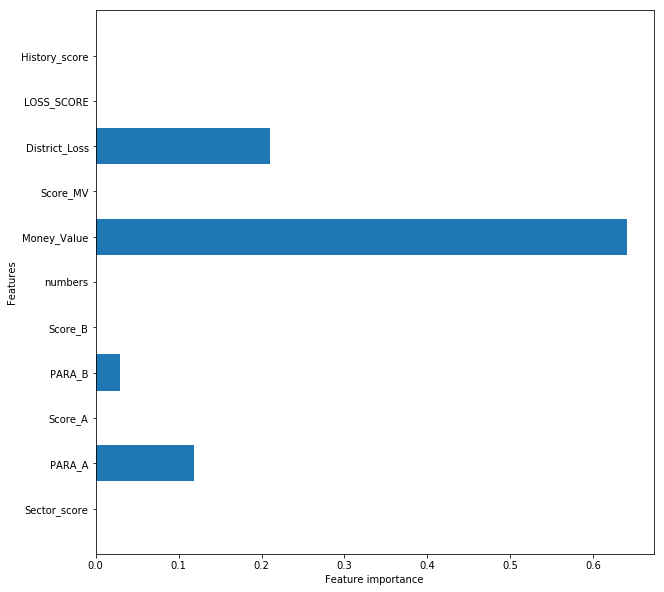

In [92]:
from sklearn import tree
dtree.fit(X_train, y_train)
def plot_feature_importances_risk(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(X.columns))
    plt.xlabel("Feature importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
plt.figure(figsize=(10,10))
plot_feature_importances_risk(dtree)

In [93]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/' + 'C:/Users/jmoha/AppData/Local/conda/conda/envs/fluffy/Lib/site-packages/graphviz' + 'C:/Users/jmoha/AppData/Local/conda/conda/envs/fluffy/Lib/site-packages/PIL'

# Create DOT data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtree, out_file=None, filled=True, rounded=True, special_characters=True)

# Draw graph
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
from PIL import *
import graphviz
from IPython.display import Image
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

In [94]:
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
pred = dtree.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[88  0]
 [ 6 61]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        88
           1       1.00      0.91      0.95        67

   micro avg       0.96      0.96      0.96       155
   macro avg       0.97      0.96      0.96       155
weighted avg       0.96      0.96      0.96       155



### Overview of Regression scores
All the below scores are cross validation scores

In [95]:
Regression = {'Model':['Linear Regression','KNN Regression','Ridge Regression','Lasso Regression','SVM Regression'],'Avg.Train Score':[0.7347,0.6872,0.6067,0.7377,0.6581],'Avg_Test_Score':[0.6588,0.4047,0.227,0.6695,0.4419]}
Regression_score = pd.DataFrame(Regression)
Regression_score

,Model,Avg.Train Score,Avg_Test_Score
0,Linear Regression,0.7347,0.6588
1,KNN Regression,0.6872,0.4047
2,Ridge Regression,0.6067,0.2270
3,Lasso Regression,0.7377,0.6695
4,SVM Regression,0.6581,0.4419


### Overview of Classification scores
All the below scores are cross validation scores

In [96]:
Classification = {'Model':['KNN classification','Logistic Regrerssion','Linear SVM','SVC - rbf','SVC - linear','SVC - poly','Decision Tree'],'Avg.Train Score':[0.9629,0.9612,0.9629,0.9629,0.9662,0.9791,0.9726],'Avg_Test_Score':[0.9348,0.9477,0.9613,0.9544,0.9544,0.9552,0.9735]}
Classification_score = pd.DataFrame(Classification)
Classification_score

,Model,Avg.Train Score,Avg_Test_Score
0,KNN classification,0.9629,0.9348
1,Logistic Regrerssion,0.9612,0.9477
2,Linear SVM,0.9629,0.9613
3,SVC - rbf,0.9629,0.9544
4,SVC - linear,0.9662,0.9544
5,SVC - poly,0.9791,0.9552
6,Decision Tree,0.9726,0.9735


## Result

#### The Best Regression model: Lasso Regression
Parameters: alpha = 0.001

#### The Best Classification model: Decision Tree

##### The important features in analysis : 'PARA_A', 'PARA_B','Score_MV', 'District_Loss', 'LOSS_SCORE'

 ###### Let's run the above models with important features only

In [97]:
p = data[['PARA_A', 'PARA_B','Score_MV', 'District_Loss', 'LOSS_SCORE']]
q = data['Risk']

from sklearn.model_selection import train_test_split

p_train_org, p_test_org, q_train, q_test = train_test_split(p, q, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
p_train = scale.fit_transform(p_train_org)
p_test = scale.transform(p_test_org)

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


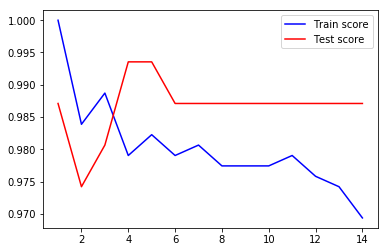

In [98]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
train_score = []
test_score = []

n = range(1,15)
for i in n:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(p_train,q_train)
    train_score.append(knn.score(p_train,q_train))
    test_score.append(knn.score(p_test,q_test))

plt.plot(n,train_score,'b',label='Train score')
plt.plot(n,test_score,'r',label = 'Test score')
plt.legend()

In [ ]:
knn = KNeighborsClassifier(3)
knn.fit(p_train, q_train)
print('Train score: {:.4f}'.format(knn.score(p_train,q_train)))
print('Test score: {:.4f}'.format(knn.score(p_test,q_test)))
predictions = knn.predict(p_test)
print(confusion_matrix(q_test,predictions))
print(classification_report(q_test,predictions))

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

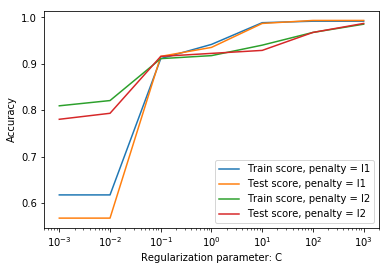

In [100]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(p_train, q_train)
    log_l2.fit(p_train, q_train)
    train_score_l1.append(log_l1.score(p_train, q_train))
    train_score_l2.append(log_l2.score(p_train, q_train))
    test_score_l1.append(log_l1.score(p_test, q_test))
    test_score_l2.append(log_l2.score(p_test, q_test))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [101]:
log_l1 = LogisticRegression(penalty = 'l1', C = 0.1)
log_l2 = LogisticRegression(penalty = 'l2', C = 0.1)
log_l1.fit(p_train,q_train)
log_l2.fit(p_train,q_train)
print("Penality: l1")
print('Train score: {:.4f}'.format(log_l1.score(p_train,q_train)))
print('Test score: {:.4f}'.format(log_l1.score(p_test,q_test)))
predictions = log_l1.predict(p_test)
print(confusion_matrix(q_test,predictions))
print(classification_report(q_test,predictions))
print("Penality: l2")
print('Train score: {:.4f}'.format(log_l2.score(p_train,q_train)))
print('Test score: {:.4f}'.format(log_l2.score(p_test,q_test)))
predictions = log_l2.predict(p_test)
print(confusion_matrix(q_test,predictions))
print(classification_report(q_test,predictions))


Penality: l1
Train score: 0.9113
Test score: 0.9161
[[88  0]
 [13 54]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        88
           1       1.00      0.81      0.89        67

   micro avg       0.92      0.92      0.92       155
   macro avg       0.94      0.90      0.91       155
weighted avg       0.93      0.92      0.91       155

Penality: l2
Train score: 0.9113
Test score: 0.9161
[[88  0]
 [13 54]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        88
           1       1.00      0.81      0.89        67

   micro avg       0.92      0.92      0.92       155
   macro avg       0.94      0.90      0.91       155
weighted avg       0.93      0.92      0.91       155



C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [102]:
# RBF SVM
#kernal = 'rbf'
C1 = [0.01,0.1,1,10]
gamma1 = [0.01,0.1,1,10]

for i in C1:
    for j in gamma1:
        svc = SVC(C=i,kernel='rbf',gamma=j)
        svc.fit(p_train,q_train)
        print('C:{},gamma:{}'.format(i,j))
        print('Train score: {:.4f},Test score: {:.4f}'.format(svc.score(p_train,q_train),svc.score(p_test,q_test)))

C:0.01,gamma:0.01
Train score: 0.6177,Test score: 0.5677
C:0.01,gamma:0.1
Train score: 0.6177,Test score: 0.5677
C:0.01,gamma:1
Train score: 0.8823,Test score: 0.8774
C:0.01,gamma:10
Train score: 0.9032,Test score: 0.8903
C:0.1,gamma:0.01
Train score: 0.6177,Test score: 0.5677
C:0.1,gamma:0.1
Train score: 0.8290,Test score: 0.8065
C:0.1,gamma:1
Train score: 0.9145,Test score: 0.9161
C:0.1,gamma:10
Train score: 0.9274,Test score: 0.9097
C:1,gamma:0.01
Train score: 0.8290,Test score: 0.8065
C:1,gamma:0.1
Train score: 0.9210,Test score: 0.9161
C:1,gamma:1
Train score: 0.9274,Test score: 0.9097
C:1,gamma:10
Train score: 0.9548,Test score: 0.9355
C:10,gamma:0.01
Train score: 0.9242,Test score: 0.9226
C:10,gamma:0.1
Train score: 0.9306,Test score: 0.9097
C:10,gamma:1
Train score: 0.9581,Test score: 0.9548
C:10,gamma:10
Train score: 0.9742,Test score: 0.9742


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3,random_state=0)
dtree.fit(p_train, q_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(p_train, q_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(p_test, q_test)))

predictions = dtree.predict(p_test)
print(confusion_matrix(q_test,predictions))
print(classification_report(q_test,predictions))
